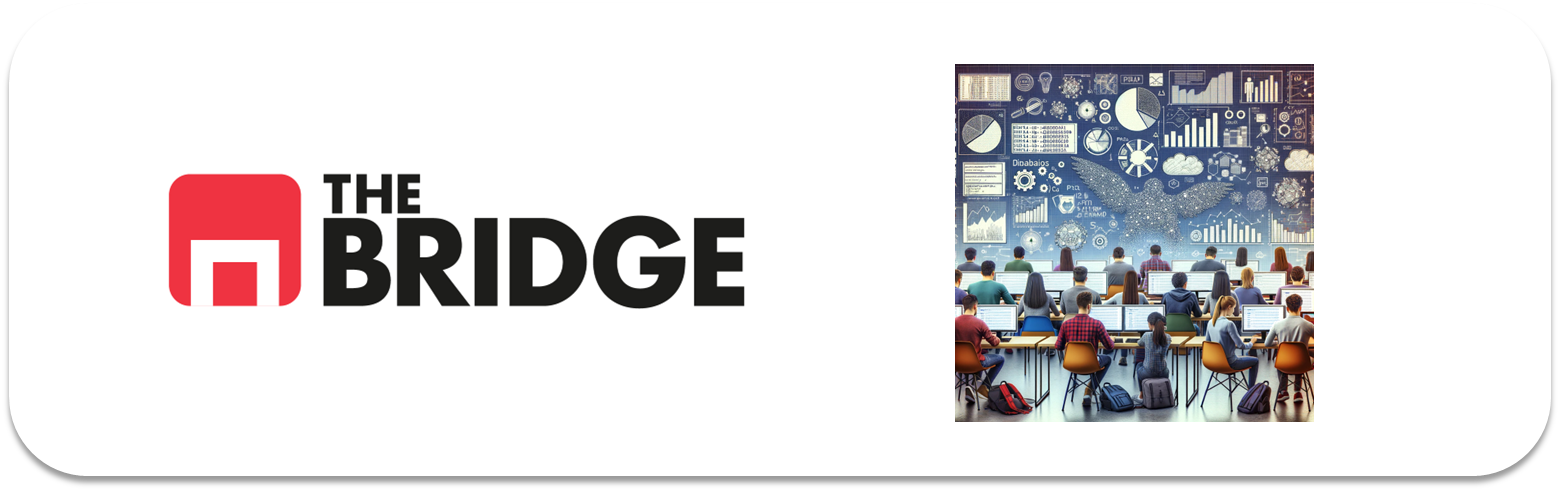

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



**1. Carga el dataset del Titanic.**

- Aqui cargo el Dataset:

In [2]:
df = pd.read_csv("data/titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


**2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.**

In [4]:
df = df.drop(columns=["class","who","adult_male","deck","embark_town","alive","alone"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


**3. Análisis del target**

- Elegimos survived como target porque es la variable que representa exactamente el fenómeno que queremos predecir, si un pasajero sobrevivió (1) o no sobrevivió (0) en el hundimiento del Titanic. Ademas esta en formato binario al contrario que alive evita pasos innecesarios de codificación que sí serían necesarios con alive.

Text(0.5, 1.0, 'Distribución del target')

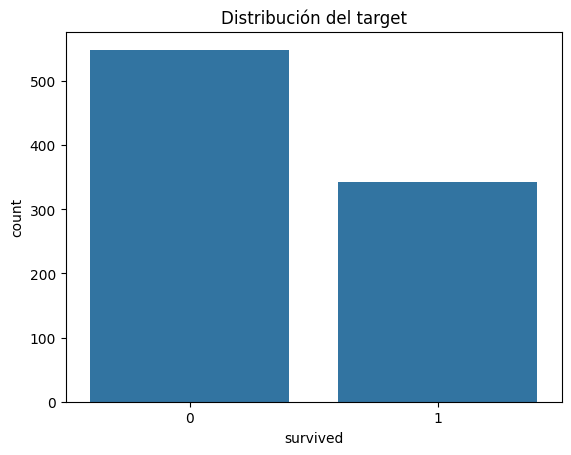

In [5]:
sns.countplot(data=df, x="survived")
plt.title("Distribución del target")


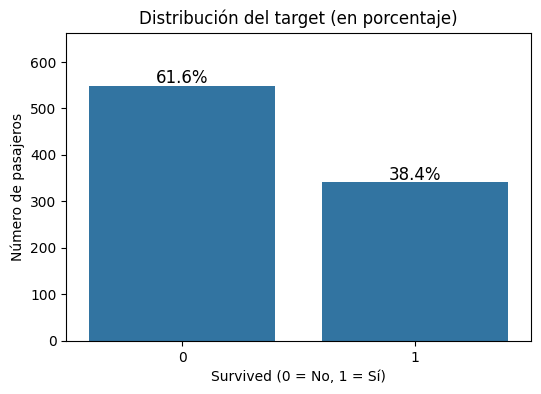

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos porcentajes
percentages = df["survived"].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x="survived")

# Añadimos etiquetas de porcentaje encima de cada barra
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 5,
        f"{percentages[i]:.1f}%",
        ha="center",
        fontsize=12
    )

plt.title("Distribución del target (en porcentaje)")
plt.ylabel("Número de pasajeros")
plt.xlabel("Survived (0 = No, 1 = Sí)")
plt.ylim(0, max(ax.get_ylim()) * 1.15)  # espacio para las etiquetas
plt.show()


Conclusión:

- 0 = no sobrevive (≈ 62%)
- 1 = sobrevive (≈ 38%)

Impacto en el modelo:

- El dataset está desbalanceado.
- Accuracy no será suficiente como métrica.
- Necesitaremos matriz de confusión, recall y ROC.

La accuracy no es una métrica fiable en problemas desbalanceados porque no distingue entre clases. Puede ser alta incluso cuando el modelo ignora completamente la clase minoritaria, como ocurre si siempre predice la clase mayoritaria. Por ello, para evaluar correctamente un modelo de supervivencia en el Titanic es necesario utilizar métricas como recall, precision, F1-score, la matriz de confusión y la curva ROC/AUC, que sí reflejan el rendimiento real del modelo en ambas clases.

**4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.**

**5. Construye las parejas X,y de train y test.**

In [7]:
df["embarked"].value_counts(dropna=False)


embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

 La presencia de este desequilibrio hace que la variable embarked tenga un peso estructural importante en el dataset.

Dado este reparto tan desigual, si realizáramos una división aleatoria sin control, existe un riesgo elevado de que los conjuntos de entrenamiento y test queden con proporciones muy diferentes de cada puerto. Esto introduciría un sesgo no deseado: el modelo podría entrenarse sobre una distribución distinta a la que luego se utiliza para evaluarlo, afectando negativamente a su capacidad de generalización.

Por este motivo, se aplica una estratificación por embarked en el proceso de train_test_split. Esta técnica garantiza que tanto el conjunto de entrenamiento como el de test mantengan la misma proporción relativa de pasajeros por puerto, preservando la estructura original del dataset y asegurando una evaluación más robusta y representativa del modelo.

In [8]:
from sklearn.model_selection import train_test_split
# EJERCICIO 4:
# Eliminamos únicamente los nulos de 'embarked' porque aún no queremos imput
df = df.dropna(subset=["embarked"])  # no imputamos aún
# En este punto todavía NO hemos separado X e y.
# Simplemente preparamos el DataFrame para poder estratificar correctamente.


# EJERCICIO 5: # Separamos variables predictoras (X) y variable objetivo (y)
X = df.drop("survived", axis=1)
y = df["survived"]

# Realizamos el split estratificado por 'embarked'
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42, 
    stratify=df["embarked"]
)


Ejercicio 4

Primero se eliminan las filas con valores nulos en embarked, ya que todavía no se desea imputar. Esto es necesario para poder aplicar una estratificación correcta. La estratificación garantiza que tanto el conjunto de entrenamiento como el de test mantengan la misma proporción de pasajeros embarcados en Southampton, Cherbourg y Queenstown.

Ejercicio 5

Una vez limpio el dataset, se construyen las parejas X (features) y y (target).
Después se realiza el train_test_split, obteniendo X_train, X_test, y_train y y_test.
El parámetro stratify=df["embarked"] asegura que la distribución de puertos se conserva en ambos conjuntos, cumpliendo así los requisitos del ejercicio.

**6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.**


En esta fase se realiza la imputación de valores nulos tanto en las variables numéricas como en las categóricas. Para ello, se crean copias de X_train y X_test con el fin de preservar los datos originales y trabajar sobre versiones imputadas.

Primero se identifican las columnas numéricas y categóricas mediante select_dtypes, lo que permite aplicar un tratamiento diferenciado a cada tipo de variable.
A continuación:

- Para las variables numéricas, se calcula la media utilizando únicamente el conjunto de entrenamiento (X_train_imp).
- Para las variables categóricas, se obtiene la moda, es decir, el valor más frecuente en cada columna.
- Estos valores (medias y modas) se utilizan para imputar los nulos en X_train_imp y X_test_imp, garantizando que:
- La imputación se basa exclusivamente en información del conjunto de entrenamiento, evitando data leakage.
- El mismo criterio de imputación se aplica a ambos conjuntos, manteniendo coherencia entre train y test.
- El modelo recibe datos completos, sin valores faltantes que puedan afectar al entrenamiento o a la evaluación.
- Este procedimiento asegura una imputación consistente, reproducible y metodológicamente correcta, respetando las buenas prácticas de validación en machine learning.

In [9]:
# Creamos copias de los conjuntos de entrenamiento y test
# para no modificar los originales y mantener un flujo de trabajo limpio.
X_train_imp = X_train.copy()
X_test_imp = X_test.copy()

# Identificamos columnas numéricas y categóricas.
# Esto permite aplicar un método de imputación distinto según el tipo de variable.
num_cols = X_train_imp.select_dtypes(include=np.number).columns
cat_cols = X_train_imp.select_dtypes(exclude=np.number).columns

# Calculamos los valores de imputación:
# - Media para variables numéricas (solo usando X_train para evitar data leakage)
# - Moda para variables categóricas (valor más frecuente)
means = X_train_imp[num_cols].mean()
modes = X_train_imp[cat_cols].mode().iloc[0]

# Imputamos los valores nulos en el conjunto de entrenamiento:
# - Numéricas con la media
# - Categóricas con la moda
X_train_imp[num_cols] = X_train_imp[num_cols].fillna(means)
X_train_imp[cat_cols] = X_train_imp[cat_cols].fillna(modes)

# Aplicamos exactamente los mismos valores de imputación al conjunto de test.
# Esto garantiza coherencia y evita introducir información del test en el entrenamiento.
X_test_imp[num_cols] = X_test_imp[num_cols].fillna(means)
X_test_imp[cat_cols] = X_test_imp[cat_cols].fillna(modes)


**7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.**


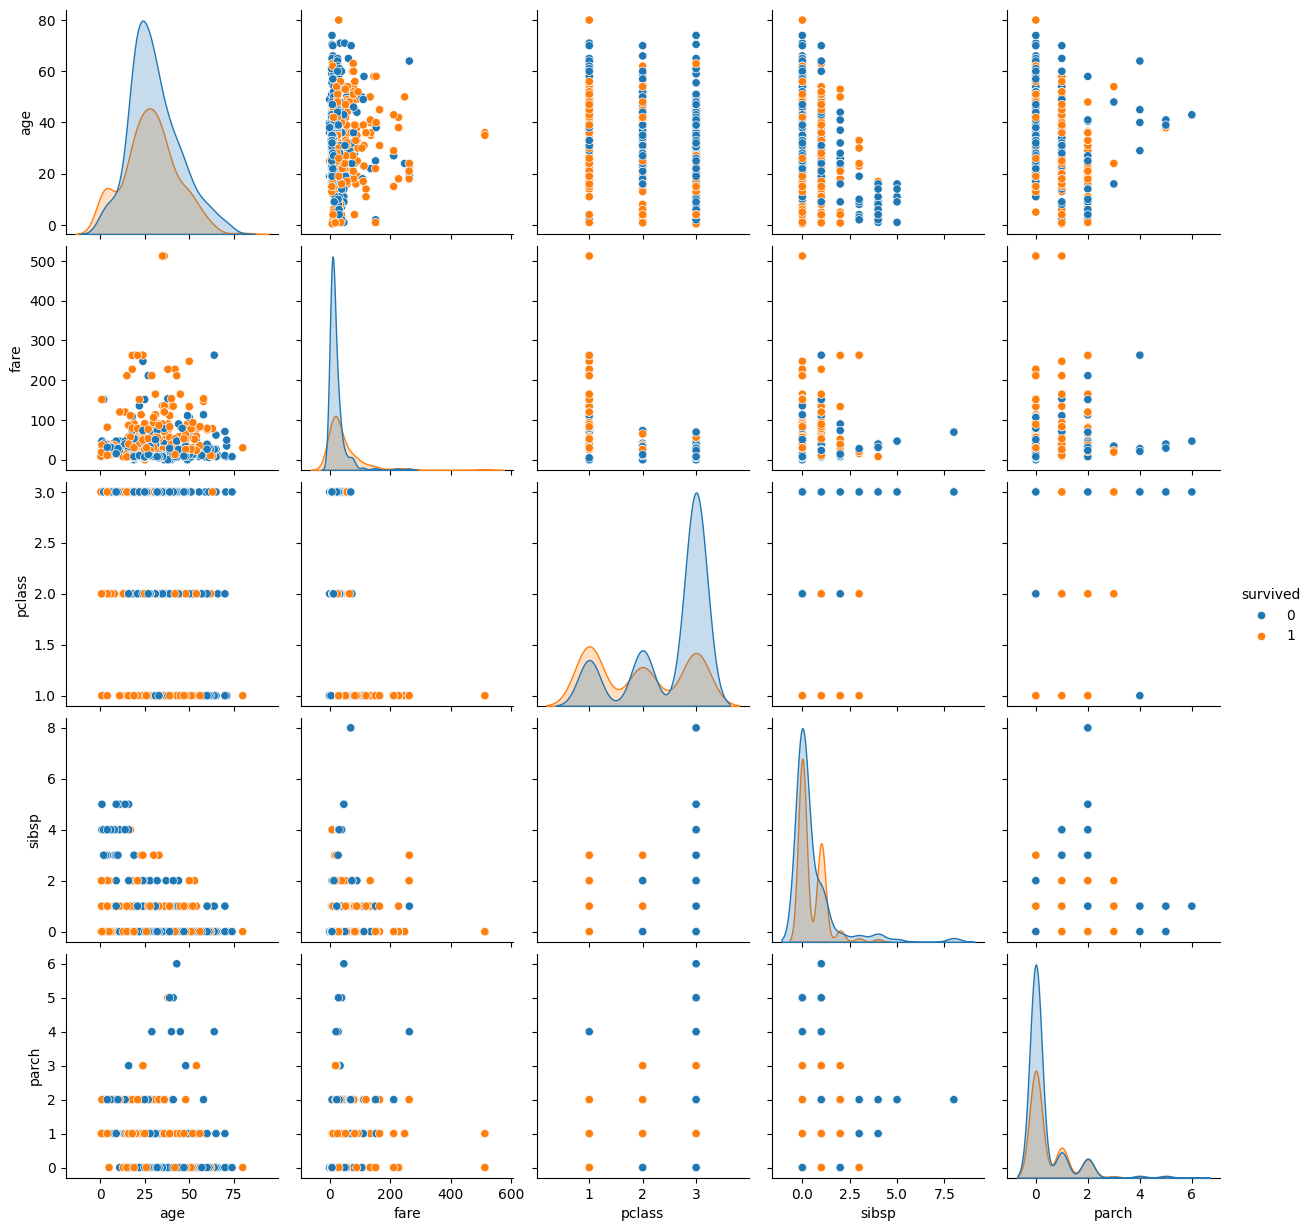

In [10]:
sns.pairplot(df[["survived","age","fare","pclass","sibsp","parch"]], hue="survived")

1. Relación entre edad (age) y supervivencia
- Se observa que los pasajeros más jóvenes (especialmente niños) tienen una mayor proporción de supervivencia (más puntos naranjas).
- La densidad de edad para los que sobrevivieron está desplazada hacia edades más bajas.
- Esto sugiere que la edad influye en la probabilidad de supervivencia, posiblemente por prioridad en el rescate.

2. Relación entre tarifa (fare) y supervivencia
- Los pasajeros que pagaron tarifas más altas (fare) tienen mayor probabilidad de haber sobrevivido.
- Esto se alinea con la hipótesis de que los pasajeros de clases más altas tenían mejor acceso a los botes salvavidas.
- La variable fare muestra una distribución muy sesgada, con algunos valores extremos (outliers).

3. Relación entre clase (pclass) y supervivencia
- Los pasajeros de primera clase (pclass = 1) tienen una mayor proporción de supervivencia.
- En cambio, los de tercera clase (pclass = 3) presentan una mayor concentración de fallecidos.
- Esto confirma que la clase social fue un factor determinante en el acceso al rescate.

4. Relación entre sibsp y parch con supervivencia
- Los pasajeros que viajaban solos (sibsp = 0, parch = 0) tienen menor probabilidad de supervivencia.
- Aquellos que viajaban con una o dos personas muestran mayor proporción de supervivencia.
- Esto sugiere que viajar acompañado pudo facilitar el acceso al rescate, aunque grupos grandes no parecen tener ventaja.

5. Distribuciones por clase y supervivencia
- Las distribuciones marginales (diagonales del pairplot) muestran diferencias claras entre sobrevivientes y no sobrevivientes en variables como age, fare y pclass.
- Esto indica que estas variables tienen poder discriminativo y podrían ser útiles para el modelo predictivo.

Conclusión general para el informe
- El análisis visual mediante pairplots revela patrones significativos entre las variables numéricas y la supervivencia. Variables como age, fare, pclass, sibsp y parch muestran correlaciones claras con la variable objetivo survived. En particular, los pasajeros más jóvenes, de primera clase, con tarifas más altas y que viajaban acompañados presentan mayores tasas de supervivencia. Estas observaciones respaldan la selección de estas variables como predictoras relevantes en el modelo de clasificación.

**8. Trata las variables para que funcionen lo mejor posible en el modelo.**

- Procesamiento de variables One‑hot encoding para categóricas
- Escalado para numéricas

In [11]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definimos qué columnas son numéricas y cuáles son categóricas.
# Esto es fundamental porque cada tipo de variable requiere un tratamiento distinto.
num_cols = ["age","fare","sibsp","parch"]
cat_cols = ["sex","pclass","embarked"]

# Creamos un ColumnTransformer que aplicará transformaciones diferentes
# según el tipo de columna.
preprocess = ColumnTransformer(
    transformers=[
        # 1) Transformación para variables numéricas:
        #    StandardScaler estandariza cada variable restando la media
        #    y dividiendo por la desviación estándar.
        #    Esto mejora el rendimiento de modelos lineales y basados en distancia.
        ("num", StandardScaler(), num_cols),

        # 2) Transformación para variables categóricas:
        #    OneHotEncoder convierte cada categoría en columnas binarias.
        #    drop="first" elimina la primera categoría para evitar multicolinealidad.
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ]
)


- El objeto ColumnTransformer permite aplicar diferentes transformaciones a distintos tipos de variables dentro del mismo pipeline. En este caso, las variables numéricas (age, fare, sibsp, parch) se estandarizan mediante StandardScaler, mientras que las variables categóricas (sex, pclass, embarked) se codifican mediante OneHotEncoder con eliminación de la primera categoría para evitar multicolinealidad. Este preprocesamiento garantiza que todas las variables queden en un formato adecuado para el modelo de clasificación.

**9. Construye un modelo de regresión logística**

- Se construye un pipeline que integra el preprocesamiento y el modelo de clasificación. En el primer paso, el ColumnTransformer estandariza las variables numéricas y codifica las variables categóricas mediante one-hot encoding. En el segundo paso, se entrena una regresión logística con un límite ampliado de iteraciones para asegurar la convergencia del algoritmo.

- El uso de un pipeline garantiza que el preprocesamiento se aplique de forma consistente y evita fugas de información, además de simplificar la validación y las predicciones posteriores.

In [13]:
from sklearn.linear_model import LogisticRegression

# Creamos un Pipeline que encadena el preprocesamiento y el modelo.
log_reg = Pipeline(steps=[
    
    # Primer paso del pipeline: "prep"
    # Aquí se aplica el preprocesador que definiste antes (ColumnTransformer).
    # Este preprocesador:
    #   - estandariza las variables numéricas con StandardScaler
    #   - codifica las variables categóricas con OneHotEncoder
    #   - deja los datos listos para entrar al modelo
    ("prep", preprocess),

    # Segundo paso del pipeline: "model"
    # Se entrena una regresión logística.
    # max_iter=5000 aumenta el número de iteraciones permitidas para asegurar
    # que el algoritmo converge incluso con muchas variables transformadas.
    ("model", LogisticRegression(max_iter=5000))
])

# Entrenamos el pipeline completo con los datos de entrenamiento imputados.
# Internamente ocurre lo siguiente:
#   1. El pipeline aplica el preprocesamiento a X_train_imp.
#   2. Una vez transformados los datos, entrena la regresión logística.
log_reg.fit(X_train_imp, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains s

**10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.**

In [ ]:
'''Esto extrae:
- model → la regresión logística entrenada.
- ohe → el OneHotEncoder que transformó las variables categóricas.
- Esto es necesario porque, después del preprocesado, las variables ya no son las originales: las categóricas se expanden en muchas columnas dummy.'''

model = log_reg.named_steps["model"]
ohe = log_reg.named_steps["prep"].named_transformers_["cat"]

'''Aquí se genera la lista completa de variables que realmente entraron al modelo:
- Primero las numéricas (num_cols)
- Luego todas las columnas creadas por el OneHotEncoder
- Esto permite interpretar los coeficientes correctamente, porque si no, solo verías números sin saber a qué variable corresponden.'''

feature_names = num_cols + list(ohe.get_feature_names_out(cat_cols))

'''La regresión logística asigna un coeficiente a cada variable.
- Ese coeficiente indica:
- Coeficiente positivo → aumenta la probabilidad del evento (clase 1)
- Coeficiente negativo → la reduce'''
coefs = model.coef_.ravel()

pd.DataFrame({"feature": feature_names, "coef": coefs}).sort_values("coef")


,feature,coef
4,sex_male,-2.642652
6,pclass_3,-1.568910
5,pclass_2,-0.487832
8,embarked_S,-0.390488
0,age,-0.353516
2,sibsp,-0.316889
3,parch,-0.127393
7,embarked_Q,0.053161
1,fare,0.269453


Los coeficientes positivos indican un aumento en la probabilidad de la clase positiva, mientras que los coeficientes negativos reflejan un efecto contrario. Esta tabla constituye la base para interpretar el comportamiento del modelo y justificar su validez desde una perspectiva explicativa.


**11. Procesa el dataset de Test para que puedas usarlo en la evaluación**



- El conjunto de Test se procesa automáticamente mediante el pipeline, por lo que no es necesario aplicar manualmente ninguna transformación adicional.

**12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.**

Accuracy

- Para evaluar el rendimiento del modelo, se calculó la métrica accuracy tanto en el conjunto de entrenamiento como en el conjunto de test. La accuracy representa el porcentaje de predicciones correctas realizadas por el modelo.

In [15]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, log_reg.predict(X_train_imp))
acc_test = accuracy_score(y_test, log_reg.predict(X_test_imp))


- Matriz de confusión

<Axes: >

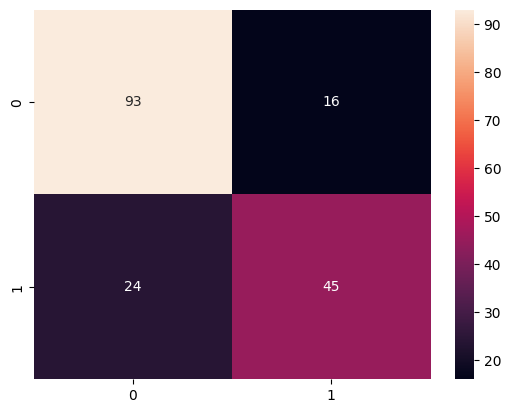

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, log_reg.predict(X_test_imp))
sns.heatmap(cm, annot=True, fmt="g")


Predicciones correctas:

- Verdaderos negativos (TN = 93): El modelo identificó correctamente 93 casos negativos.
- Verdaderos positivos (TP = 45): El modelo identificó correctamente 45 casos positivos.

Errores del modelo:

- Falsos positivos (FP = 16): El modelo predijo positivo cuando en realidad era negativo.
- Falsos negativos (FN = 24): El modelo predijo negativo cuando en realidad era positivo.

Classification report

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, log_reg.predict(X_test_imp)))


              precision    recall  f1-score   support

           0       0.79      0.85      0.82       109
           1       0.74      0.65      0.69        69

    accuracy                           0.78       178
   macro avg       0.77      0.75      0.76       178
weighted avg       0.77      0.78      0.77       178



- Clase 0 (negativa): El modelo tiene un buen rendimiento, con alta precisión (79%) y excelente capacidad de detección (recall de 85%).

- Clase 1 (positiva): Aunque la precisión es aceptable (74%), el recall baja a 65%, lo que indica que el modelo no detecta todos los casos positivos con la misma eficacia.

Conclusion: 

- El modelo muestra un rendimiento sólido en la clase mayoritaria (0), pero tiene dificultades para capturar todos los casos positivos (clase 1), lo que se refleja en un recall más bajo.
- La diferencia entre precisión y recall en la clase positiva sugiere que el modelo tiende a ser conservador, evitando falsos positivos pero a costa de dejar pasar verdaderos positivos.

Curva ROC

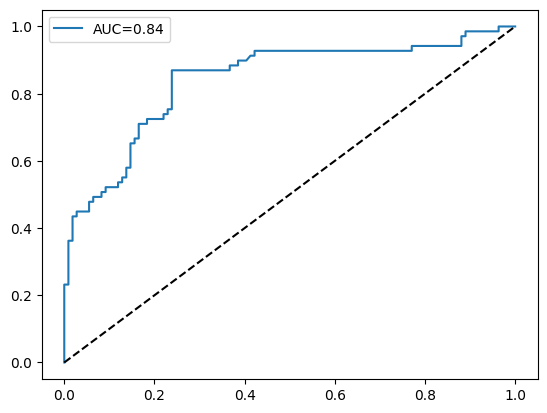

In [19]:
from sklearn.metrics import roc_curve, auc

probs = log_reg.predict_proba(X_test_imp)[:,1]
fpr, tpr, th = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC={roc_auc:.2f}")
plt.plot([0,1],[0,1],"k--")
plt.legend()


Concluison:

- Aunque el modelo muestra una sensibilidad limitada en la clase positiva bajo el umbral estándar (0.5), la curva ROC revela una capacidad de discriminación sólida (AUC = 0.84). Esto indica que el modelo tiene potencial para mejorar la detección de positivos mediante un ajuste del umbral de decisión. En contextos donde la clase positiva representa un evento crítico, esta estrategia permitiría aumentar la sensibilidad sin comprometer excesivamente la precisión.

**13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.**


In [20]:
samples = pd.DataFrame([
    {"sex":"male","age":a,"pclass":2,"sibsp":0,"parch":0,"fare":0,"embarked":"S"}
    for a in range(30,41)
])

probs = log_reg.predict_proba(samples)[:,1]
probs.mean()


np.float64(0.22103022159709332)

Conclusión:
- La probabilidad media de supervivencia para un hombre de entre 30 y 40 años, viajando solo en segunda clase, embarcado en Southampton y sin haber pagado billete, es aproximadamente 0.22, es decir, un 22%.

**14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.**
- Modelo Multiclase (target = pclass)

In [21]:
X2_train = X_train_imp.copy()
X2_test = X_test_imp.copy()

X2_train["survived"] = y_train
X2_test["survived"] = y_test

y2_train = X_train["pclass"]
y2_test = X_test["pclass"]

X2_train = X2_train.drop(columns=["pclass"])
X2_test = X2_test.drop(columns=["pclass"])


- Cambio de variable target a pclass

Entrenamiento:

In [22]:
num_cols_multi = ["age","fare","sibsp","parch"]
cat_cols_multi = ["sex","embarked"]   # pclass ya NO está aquí

preprocess_multi = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols_multi),
        ("cat", OneHotEncoder(drop="first"), cat_cols_multi)
    ]
)


In [23]:
clf_multi = Pipeline(steps=[
    ("prep", preprocess_multi),
    ("model", LogisticRegression(max_iter=5000))
])


In [24]:
clf_multi.fit(X2_train, y2_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains s

Classification report

In [25]:
print(classification_report(y2_test, clf_multi.predict(X2_test)))


              precision    recall  f1-score   support

           1       0.98      0.88      0.93        51
           2       0.62      0.24      0.35        41
           3       0.72      0.98      0.83        86

    accuracy                           0.78       178
   macro avg       0.78      0.70      0.70       178
weighted avg       0.77      0.78      0.75       178



Conclusion:
- El modelo muestra un rendimiento muy sólido al distinguir entre primera y tercera clase, con valores de precisión y recall elevados en ambas categorías. Sin embargo, presenta dificultades significativas para identificar correctamente a los pasajeros de segunda clase, lo que se refleja en un recall muy bajo (0.24). Esto indica que la clase 2 no está bien separada en el espacio de características y sugiere que sería necesario incorporar más variables, aplicar técnicas de balanceo o utilizar modelos más complejos para mejorar su detección. Aun así, el rendimiento global del modelo es aceptable, con una accuracy del 78% y un F1 ponderado del 75%.